<a href="https://colab.research.google.com/github/gressus/NN/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%2209_Word2Vec_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/minsuk-heo/tf2/blob/master/jupyter_notebooks/09.Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

In [ ]:
# Load Pretrained Word2Vec
embed = hub.load("https://tfhub.dev/google/Wiki-words-250-with-normalization/2")

In [ ]:
words = ["coffee", "cafe", "Coffeehouse", "Bistro", "Cafeteria", "football", "soccer", "Tearoom", 
         "Diner", "Eatery", "Brasserie", "Canteen", "Coffee shop", "Espresso bar", "cat", "dog", "croissant", "horse"]

# Compute embeddings.
embeddings = embed(words)

In [ ]:
print(embeddings.shape)

(17, 250)


In [ ]:
print(embeddings[0])

tf.Tensor(
[-0.02354056 -0.08136939 -0.09588724  0.04267474 -0.03513853  0.09099629
 -0.01959137 -0.07235982 -0.04527646 -0.02064468 -0.05868183  0.05026427
  0.08757452 -0.02868579 -0.00528093 -0.07107743 -0.00430126 -0.1111517
 -0.0371297  -0.07397588  0.01366727  0.04489887  0.10918173 -0.00385636
 -0.00768068 -0.12602517  0.0073157   0.0887766  -0.06376575 -0.02794223
  0.07697963 -0.00691205 -0.05405519 -0.11509552  0.02446181 -0.01677185
 -0.07807938 -0.05697621 -0.08125712 -0.08814868 -0.08236694 -0.08067547
  0.0609058  -0.03083544 -0.03890334 -0.04752342  0.05156425  0.06546737
 -0.00422008 -0.05087236  0.00757163 -0.05662974 -0.02225585  0.09144896
  0.01537593 -0.03186006 -0.07453508 -0.09245355 -0.0335355  -0.02733024
 -0.09283264  0.07827969  0.01312644  0.01702355  0.03512271 -0.06434979
 -0.07367618  0.02042403 -0.09727054 -0.02774223  0.09928335  0.06212646
  0.09546035 -0.04408428 -0.00725705 -0.00057283 -0.0287641   0.03661085
 -0.05806859 -0.05408818  0.0231409  -0.0

In [ ]:
# Compute similarity matrix. Higher score indicates greater similarity.
for i in range(len(words)):
    for j in range(i,len(words)):
        print("(",words[i], ",", words[j],")",np.inner(embeddings[i], embeddings[j]))

( coffee , coffee ) 1.0
( coffee , cafe ) 0.5485246
( coffee , Coffeehouse ) 0.30511943
( coffee , Bistro ) 0.42468917
( coffee , Cafeteria ) 0.3054957
( coffee , football ) -0.0049367556
( coffee , soccer ) 0.03198619
( coffee , Tearoom ) 0.3204768
( coffee , Diner ) 0.39720085
( coffee , Eatery ) 0.43811372
( coffee , Brasserie ) 0.3782427
( coffee , Canteen ) 0.2604071
( coffee , Coffee shop ) 0.8937446
( coffee , Espresso bar ) 0.45410785
( coffee , cat ) 0.1760905
( coffee , dog ) 0.21386923
( coffee , croissant ) 0.47583872
( cafe , cafe ) 1.0
( cafe , Coffeehouse ) 0.48695132
( cafe , Bistro ) 0.6806274
( cafe , Cafeteria ) 0.58244926
( cafe , football ) 0.0658585
( cafe , soccer ) 0.15623057
( cafe , Tearoom ) 0.46529305
( cafe , Diner ) 0.6003653
( cafe , Eatery ) 0.6237197
( cafe , Brasserie ) 0.50978506
( cafe , Canteen ) 0.54604864
( cafe , Coffee shop ) 0.9105591
( cafe , Espresso bar ) 0.43423343
( cafe , cat ) 0.21920681
( cafe , dog ) 0.25762683
( cafe , croissant ) 0.2

In [ ]:
from scipy.spatial.distance import cosine

for i in range(len(words)):
    for j in range(i,len(words)):
        cosine_similarity = 1 - cosine(embeddings[i], embeddings[j])
        print("(", words[i], ",", words[j], ")", cosine_similarity)


( coffee , coffee ) 1
( coffee , cafe ) 0.5485245585441589
( coffee , Coffeehouse ) 0.30511942505836487
( coffee , Bistro ) 0.4246891140937805
( coffee , Cafeteria ) 0.3054957389831543
( coffee , football ) -0.0049367621541023254
( coffee , soccer ) 0.03198617696762085
( coffee , Tearoom ) 0.320476770401001
( coffee , Diner ) 0.3972008228302002
( coffee , Eatery ) 0.4381136894226074
( coffee , Brasserie ) 0.3782426416873932
( coffee , Canteen ) 0.26040706038475037
( coffee , Coffee shop ) 0.7262839078903198
( coffee , Espresso bar ) 0.43367257714271545
( coffee , cat ) 0.17609050869941711
( coffee , dog ) 0.21386924386024475
( coffee , croissant ) 0.47583869099617004
( cafe , cafe ) 1
( cafe , Coffeehouse ) 0.4869512617588043
( cafe , Bistro ) 0.6806274056434631
( cafe , Cafeteria ) 0.5824492573738098
( cafe , football ) 0.06585849821567535
( cafe , soccer ) 0.15623056888580322
( cafe , Tearoom ) 0.4652930498123169
( cafe , Diner ) 0.6003652811050415
( cafe , Eatery ) 0.623719692230224

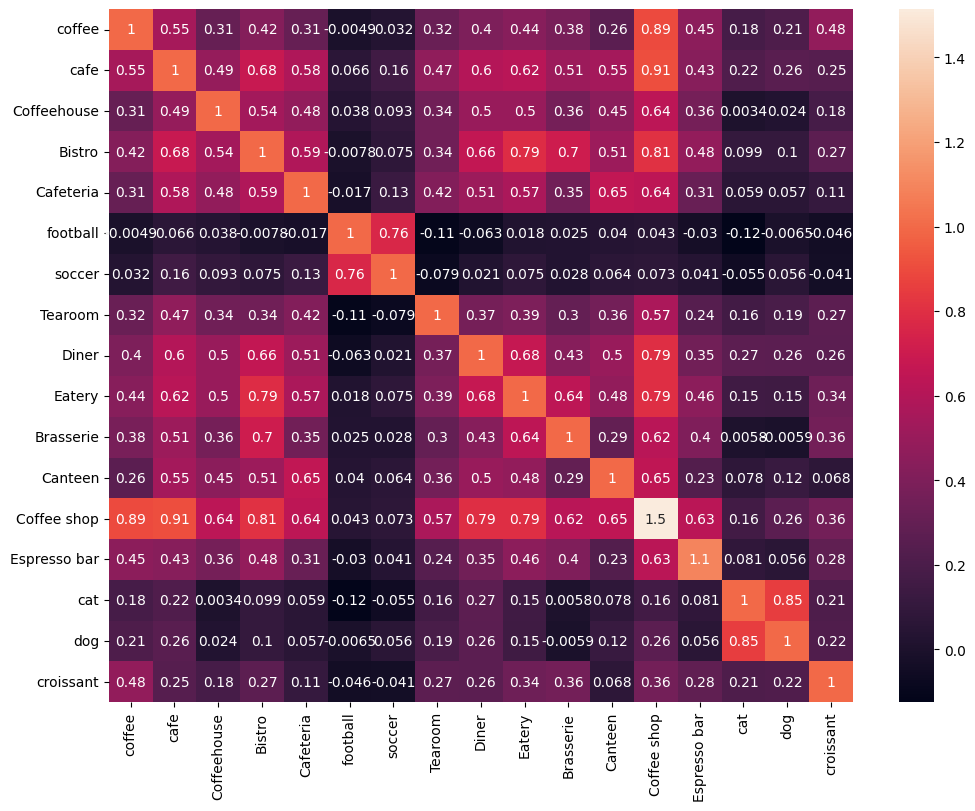

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assume words and embeddings are defined

# Initialize a zero matrix
similarity_matrix = np.zeros((len(words), len(words)))

# Compute similarity matrix. Higher score indicates greater similarity.
for i in range(len(words)):
    for j in range(i, len(words)):
        similarity = np.inner(embeddings[i], embeddings[j])
        similarity_matrix[i, j] = similarity
        similarity_matrix[j, i] = similarity  # The matrix is symmetric

plt.figure(figsize=(12, 9))  # Increase figure size
sns.heatmap(similarity_matrix, annot=True, xticklabels=words, yticklabels=words)

plt.show()


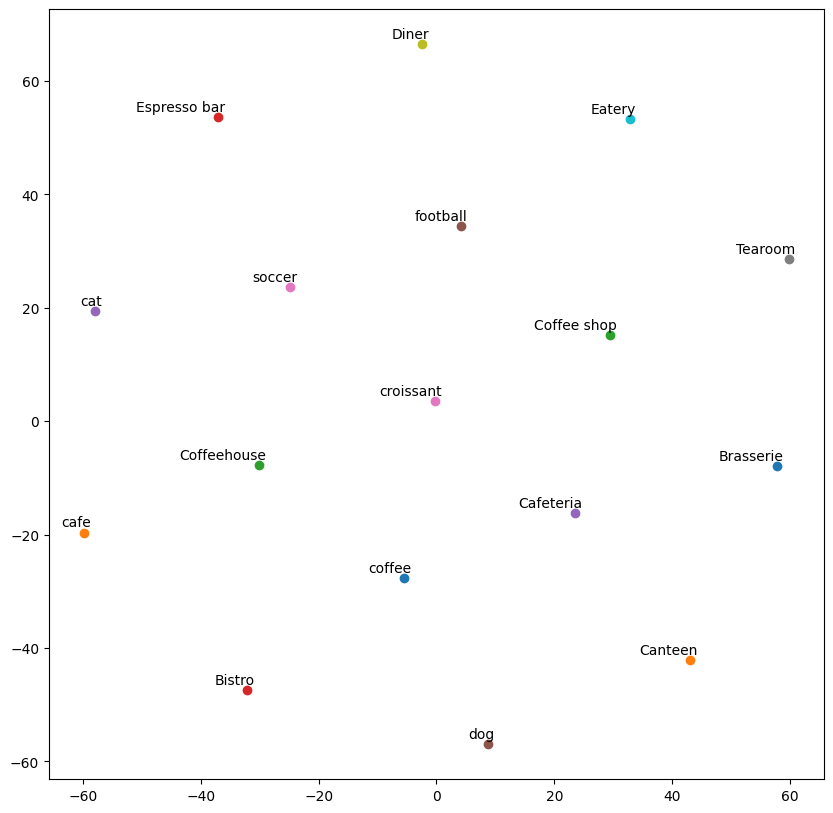

In [ ]:
# Compute t-SNE with a smaller perplexity
tsne = TSNE(n_components=2, perplexity=len(words) - 1, random_state=42)  # assuming you have more than 10 word embeddings
embeddings_2d = tsne.fit_transform(embeddings)

# Plot the result
plt.figure(figsize=(10, 10))
for i, word in enumerate(words):
    x, y = embeddings_2d[i, :]
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')

plt.show()


The t-SNE algorithm is a non-linear dimensionality reduction technique that is great for visualizing high-dimensional data in 2D or 3D, but it does not preserve distances between data points exactly. This means that while t-SNE works well for preserving the general structure of the data and keeping similar instances close, it does not always place dissimilar instances far apart. Also, t-SNE's notion of similarity tends to focus more on local rather than global structure.

Therefore, while t-SNE can give us a good intuition about our data, we should not interpret the distances between points in the t-SNE plot as exact measures of dissimilarity.

If you need a more accurate 2D representation of cosine similarity, you could use a linear dimensionality reduction technique such as PCA (Principal Component Analysis). However, please note that even PCA has its limitations, as it relies on linear assumptions. In practice, high-dimensional cosine similarities may not always be perfectly representable in 2D space.

Here's an example of how you can use PCA for this:

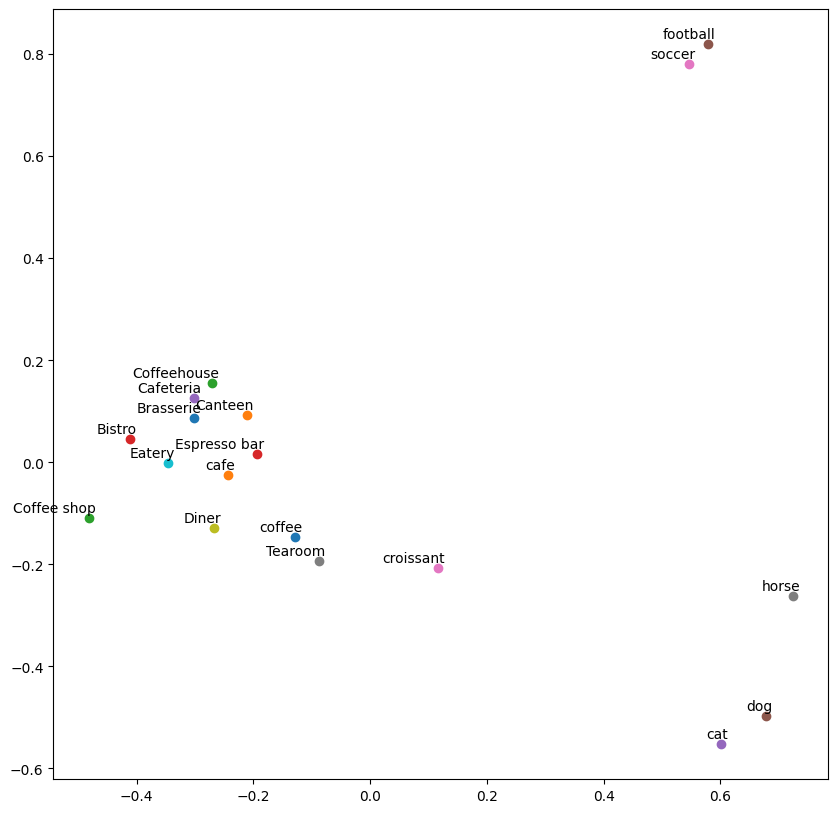

In [ ]:
from sklearn.decomposition import PCA

# Compute PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Plot the result
plt.figure(figsize=(10, 10))
for i, word in enumerate(words):
    x, y = embeddings_2d[i, :]
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')

plt.show()
